In [7]:
import pandas as pd

# Muat dataset
df = pd.read_csv("tugas5_genap.csv")

# Tampilkan 5 data pertama
print(df.head())

# Tampilkan informasi tipe data pada setiap kolom
print(df.info())


   ID  Age  Gender  Hypertension  Heart Disease  Ever Married     Work Type  \
0   1   78  Female             0              0             1       Private   
1   2   60  Female             0              0             0       Private   
2   3   69    Male             0              0             0       Private   
3   4   43    Male             0              0             1  Never Worked   
4   5   30  Female             0              0             1    Government   

  Residence Type  Average Glucose Level   BMI  ...  Dietary Habits  \
0          Rural                 267.30  36.2  ...  Non-Vegetarian   
1          Rural                 207.24  19.8  ...      Vegetarian   
2          Urban                 161.30  34.5  ...           Mixed   
3          Urban                 247.49  48.8  ...           Mixed   
4          Urban                 116.57  31.3  ...           Mixed   

  Alcohol Consumption Chronic Stress  Sleep Hours  Family History of Stroke  \
0                   0    

In [8]:
# Periksa missing values
print(df.isnull().sum())


ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64


In [9]:
# Misalkan kolom 'BMI' memiliki missing values
df['BMI'].fillna(df['BMI'].median(), inplace=True)


C:\Users\andif\AppData\Local\Temp\ipykernel_6132\3363076724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].median(), inplace=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Buat objek encoder
le = LabelEncoder()

# Tentukan kolom-kolom kategorikal
categorical_cols = ['Gender', 'Smoking Status', 'Physical Activity', 'Dietary Habits', 'Residence Type', 'Work Type', 'Education Level', 'Family History of Stroke', 'Region']

# Lakukan encoding pada kolom-kolom kategorikal
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns for scaling
numerical_cols = ['Age', 'Average Glucose Level', 'BMI', 'Stroke Risk Score', 'Sleep Hours']

# Check if all the numerical columns are actually numeric
print(df[numerical_cols].dtypes)

# Apply StandardScaler only to the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



Age                        int64
Average Glucose Level    float64
BMI                      float64
Stroke Risk Score          int64
Sleep Hours                int64
dtype: object


# K-Means

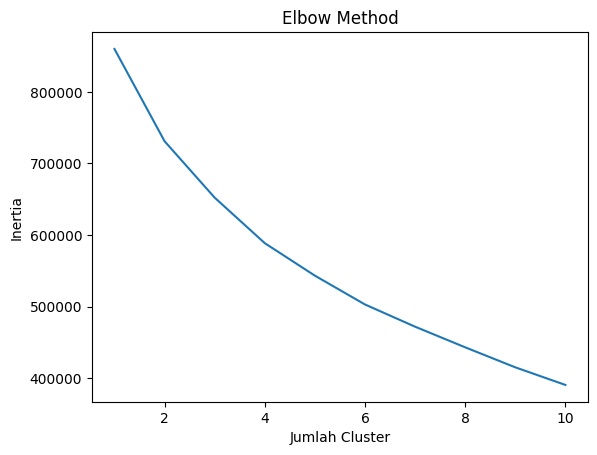

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method untuk menemukan jumlah cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)

# Plot inertia untuk menentukan elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk setiap jumlah cluster
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    silhouette_scores.append(silhouette_score(df[numerical_cols], kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Gap Statistics untuk menemukan jumlah cluster optimal
def gap_statistic(df, nrefs=10, max_clusters=10):
    gaps = np.zeros((max_clusters - 1,))
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        ref_disps = np.zeros((nrefs,))
        for i in range(nrefs):
            random_data = np.random.random_sample(size=df.shape)
            ref_kmeans = KMeans(n_clusters=k, random_state=42)
            ref_kmeans.fit(random_data)
            ref_disps[i] = np.sum(np.min(ref_kmeans.transform(random_data), axis=1))
        gap = np.mean(np.log(ref_disps)) - np.log(np.sum(np.min(kmeans.transform(df), axis=1)))
        gaps[k - 2] = gap
    return gaps

# Plot Gap Statistics
gaps = gap_statistic(df[numerical_cols])
plt.plot(range(2, 11), gaps)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics')
plt.show()


In [ ]:
# Terapkan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])

# Visualisasi hasil clustering
plt.scatter(df['Age'], df['Average Glucose Level'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Clustering with K-Means')
plt.show()


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Terapkan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[numerical_cols])

# Visualisasi hasil clustering DBSCAN
plt.scatter(df['Age'], df['Average Glucose Level'], c=df['DBSCAN_Cluster'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Clustering with DBSCAN')
plt.show()
